In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


[Problem 1] Feature selection for practice

In [76]:
data = np.stack((df['GrLivArea'], df['YearBuilt'], df['SalePrice']),axis=-1)
data = pd.DataFrame(data, columns=['GrLivArea', 'YearBuilt',"SalePrice"])

data

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [77]:
data.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


[Problem 2] Estimation and evaluation by linear regression

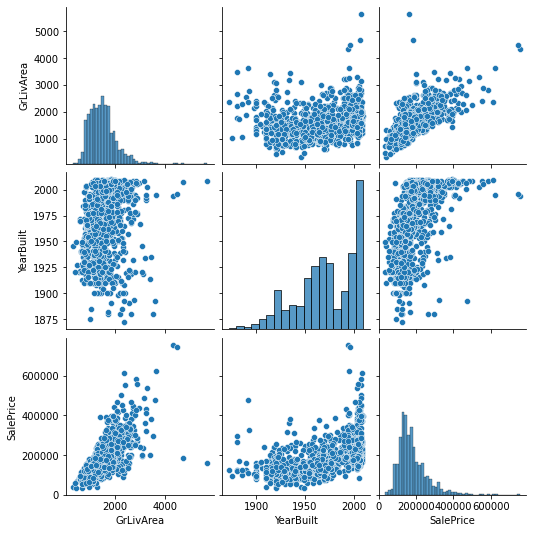

In [78]:
import seaborn as sns
sns.pairplot(data)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
total_data = np.stack((df['GrLivArea'], df['YearBuilt']),axis=-1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(total_data, y, test_size=0.25, random_state=20)
print("X_train")
print(X_train.shape)
print("--------------------------------------")
print("X_test")
print(X_test.shape)
print("--------------------------------------")
print("y_train")
print(y_train.shape)
print("--------------------------------------")
print("y_test")
print(y_test.shape)
print("--------------------------------------")


X_train
(1095, 2)
--------------------------------------
X_test
(365, 2)
--------------------------------------
y_train
(1095,)
--------------------------------------
y_test
(365,)
--------------------------------------


In [80]:
#Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [81]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

2093588934.1069355

In [82]:
#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
print(X_train_transform)
print(X_test_transform)
print('------------------------')

StandardScaler()
[1515.58356164 1970.95159817]
[[-1.65283379  0.03465924]
 [ 0.01757463  0.96031465]
 [-0.286645   -1.68441508]
 ...
 [-0.28477862 -0.56040494]
 [ 0.25460466  0.96031465]
 [-0.2269209   1.15866938]]
[[-9.99601445e-01  1.33836608e-01]
 [ 3.79651991e-01  7.28900796e-01]
 [-1.22170044e+00 -1.02323265e+00]
 [ 1.24751782e+00  1.22478762e+00]
 [-2.15722631e-01  2.33013973e-01]
 [ 2.43406388e-01  1.09255113e+00]
 [ 1.57226762e+00 -2.08112454e+00]
 [ 1.38889213e-01  1.22478762e+00]
 [-2.30653656e-01  1.99954851e-01]
 [ 4.07647663e-01  1.12561025e+00]
 [ 2.11677960e-01  1.02643289e+00]
 [ 1.01235418e+00 -1.78359244e+00]
 [ 9.59625160e-02  1.99954851e-01]
 [ 6.16682014e-01 -7.25700552e-01]
 [ 1.66884885e-01 -1.84971069e+00]
 [-1.21610131e+00  3.46592434e-02]
 [-7.83101582e-01 -6.45181212e-02]
 [-3.91162175e-01 -1.02323265e+00]
 [-1.89593338e-01  1.09255113e+00]
 [ 3.50770173e+00 -1.88276981e+00]
 [-8.61489464e-01 -6.45181212e-02]
 [ 1.63152129e-01  6.95841675e-01]
 [ 9.71293858e-

In [83]:
#estimation
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_neigh_3  = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train_transform,y_train)
pre_3 = k_neigh_3.predict(X_test_transform)
print(pre_3)
k_neigh_5 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(X_train_transform,y_train)
pre_5 = k_neigh_5.predict(X_test_transform)
print(pre_5)
k_neigh_1 = KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(X_train_transform,y_train)
pre_1 = k_neigh_1.predict(X_test_transform)
print(pre_1)

[128000 187000  91300 280000 148500 173000 104000 235128 159500 196500
 195000 130000 155000 124500 128000 111250  88000 105000 178740 197000
 138500 178000 135000 120000 135000 122000 115000 131400  95000  97000
 109900 290000 176432  75500  68400 187000 106500 283463 141000 147000
 155000 106500 223500  88000 221500 135900 100000 325300 179000 108000
  89500 185000 117000 183500 174000 250000 128900 194000 128200  76000
 133700 173000 146000 135000 148500 106000 120000 127000 180000 140000
 118858  81000 236000 160000  99500 164990 132000  98600 127500 290000
 281213  91300 122500 132500 173500 155835 113000  97000  79900 199900
 133700 124000 185000 159500 230000 185000 120000 123000 134000 117000
 190000 141000 109900 177000 155835  68400 174000  55000  79900 345000
 204900 215200  93500 424870 179500 170000 133000 269500 160000 125000
 177000 110000 202900 155000 236000 216500 138000 164000 125000 143000
 108000 107500 122500 155000  84500 125000 173000 115000 320000 207500
  8540

In [84]:
# Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
pred = [pre_3,pre_1,pre_5]
keys = ["knn3","knn1","knn5"]
for a , prediction in enumerate(pred,0):
    print("prediction of " , keys[a])
    print("accuracy_score " , accuracy_score(y_true = y_test , y_pred =prediction ))
    print("precision_score of " , precision_score(y_true = y_test, y_pred=prediction, average=None))
    print("recall_score of " , recall_score(y_true= y_test, y_pred=prediction, average=None))
    print("f1_score of " , f1_score(y_true= y_test, y_pred=prediction, average=None))
    print("confusion_matrix of " ,confusion_matrix(y_true= y_test, y_pred=prediction))
    

prediction of  knn3
accuracy_score  0.0136986301369863
precision_score of  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

recall_score of  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: Un

In [85]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def visualization(preds ,title):
    fig ,(ax1,ax2) = plt.subplots(nrows =1 ,ncols = 2,figsize =(12,5) )
    ax1.scatter(X_test[:,0],y_test)
    ax1.scatter(X_test[:,0],preds,c = 'red')
    classes = ['actual','predicted']
    ax1.legend(labels = classes)
    
    ax2.scatter(X_test[:,1],y_test)
    ax2.scatter(X_test[:,1],preds,c = 'red')
    classes = ['actual','predicted']
    ax2.legend(labels = classes)
    

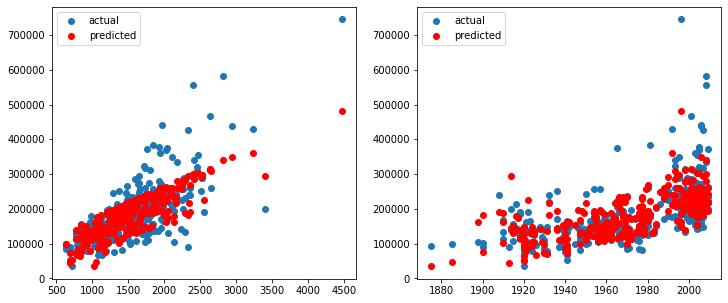

In [86]:
visualization(y_pred , "visualization")

[Problem 3] Comparison of methods

-0.055854724882621776
6806709769.946895


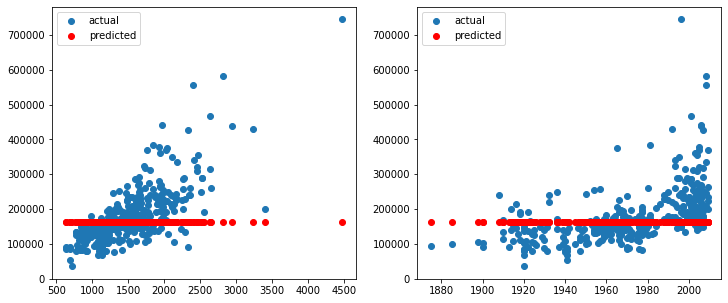

In [87]:
#SVM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_reg =SVR()
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
score = r2_score(y_test, y_pred_svr)
print(score)

print(mean_squared_error(y_test, y_pred_svr))
visualization(y_pred_svr,"SVR")

0.736383495970107
1699439317.9412012


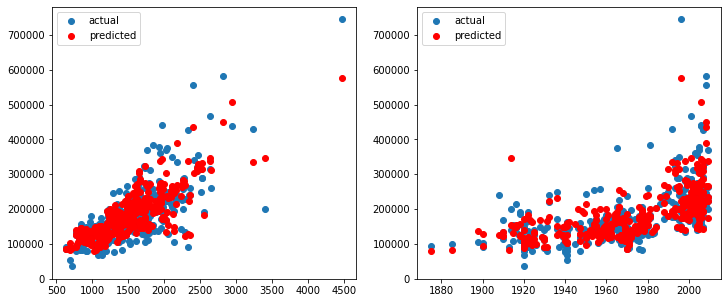

In [88]:

#Random forest
from sklearn.ensemble import RandomForestRegressor
rnd_reg =RandomForestRegressor()
rnd_reg.fit(X_train, y_train)
y_pred_srnd = rnd_reg.predict(X_test)
score = r2_score(y_test, y_pred_srnd)
print(score)
print(mean_squared_error(y_test, y_pred_srnd))
visualization(y_pred_srnd,"SVR")

0.736383495970107
error 1,699,439,317.941


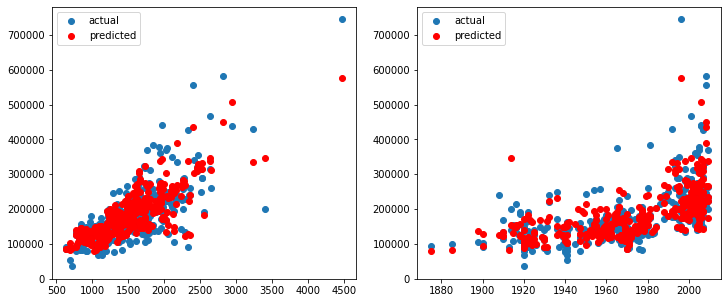

In [89]:
#Random forest
from sklearn.tree import DecisionTreeRegressor
dtr_reg =DecisionTreeRegressor()
dtr_reg.fit(X_train, y_train)
y_pred_dtr = rnd_reg.predict(X_test)
score = r2_score(y_test, y_pred_dtr)
print(score)
err = mean_squared_error(y_test, y_pred_dtr)
print("error {:,.3f}".format(err))
visualization(y_pred_dtr,"SVR")

[Problem 4] (Advance assignment) Learning using other features

In [90]:
df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [91]:
data = df.loc[:,['GrLivArea','OverallQual','YearBuilt','GarageCars','GarageArea']]
y = df['SalePrice']
data.head()

,GrLivArea,OverallQual,YearBuilt,GarageCars,GarageArea
0,1710,7,2003,2,548
1,1262,6,1976,2,460
2,1786,7,2001,2,608
3,1717,7,1915,3,642
4,2198,8,2000,3,836


In [128]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data, y, test_size=0.25 )
X2_test

,GrLivArea,OverallQual,YearBuilt,GarageCars,GarageArea
867,1120,4,1961,2,544
648,1839,6,1966,2,442
523,4676,10,2007,3,884
1119,1040,5,1959,1,286
60,1158,6,2004,2,576
...,...,...,...,...,...
1109,1836,8,2004,3,862
308,861,4,1940,2,539
183,2082,7,2003,2,484
63,1710,7,1921,2,480


In [99]:

scaler = StandardScaler()
print(scaler.fit(X2_train))
print(scaler.mean_)
X_train_transform2 = scaler.transform(X2_train)
X_test_transform2 = scaler.transform(X2_test)
print(X_train_transform2)
print(X_test_transform2)
print('------------------------')

StandardScaler()
[1.50170228e+03 6.07123288e+00 1.97090776e+03 1.75981735e+00
 4.70640183e+02]
[[-1.01900197 -0.78282919 -0.32722116  0.3250567   0.47915958]
 [-0.33266147 -0.05205514  0.20120678  0.3250567   0.75334373]
 [ 0.70081657 -0.05205514  0.16818004  0.3250567   0.1955208 ]
 ...
 [-0.01726222 -0.05205514  0.86174171  0.3250567   0.17661155]
 [ 0.97059202 -0.05205514 -1.28499681  0.3250567  -0.18266424]
 [-0.09065702 -0.05205514  1.15898243  0.3250567  -0.19684617]]
[[ 0.0620835   0.67871892  0.13515329  0.3250567   0.49806883]
 [ 1.22846562  2.14026703  1.15898243  1.67842966  1.23552965]
 [-0.17992095  0.67871892  0.20120678  0.3250567   0.34679481]
 ...
 [-0.76509566 -0.05205514 -0.29419442  0.3250567  -0.14484573]
 [-0.30489047 -0.05205514 -0.16208743  0.3250567  -0.08339066]
 [-0.22951203 -0.05205514  0.23423353  0.3250567  -0.14484573]]
------------------------


In [123]:
method_list = ['LinearRegsession','SVR','DecisionTreeRegsessor','RandomForestRegressor']
df_mse = pd.DataFrame(columns = method_list+['mean_squared_error']).set_index('mean_squared_error')  
def Regression_Model(x_tr , x_ts , y_tr , y_ts , fe_list):
    method_list = ['LinearRegsession','SVR','DecisionTreeRegsessor','RandomForestRegressor']
    lr = LinearRegression().fit(x_tr,y_tr).predict(x_ts)
    svr = SVR().fit(x_tr,y_tr).predict(x_ts)
    dtr = DecisionTreeRegressor().fit(x_tr,y_tr).predict(x_ts)
    rfr = RandomForestRegressor().fit(x_tr,y_tr).predict(x_ts)
    y_pred_list = [lr,svr,dtr,rfr]
    mse_list = [mean_squared_error(y_ts,lr),mean_squared_error(y_ts,svr),mean_squared_error(y_ts,dtr),mean_squared_error(y_ts,rfr)]
    df_mse.loc['MSE with 5 features'] = mse_list
    display(df_mse)
    for method , y_pred in zip(method_list,y_pred_list):
        fig , axes = plt.subplots(1,len(fe_list),figsize = (6*len(fe_list), 5),sharey =True)
        fig.suptitle(method,fontweight= "bold",size = 20)
        for i in range(len(fe_list)):
            axes[i].scatter(x_ts[:,i],y_ts,color='red',label='test data')
            axes[i].scatter(x_ts[:,i],y_pred,color='blue',label='pred data')  
            axes[i].set_title(fe_list[i])
            axes[i].set_ylabel('SalePrice')
            axes[i].legend()
        plt.show()
         

,LinearRegsession,SVR,DecisionTreeRegsessor,RandomForestRegressor
mean_squared_error,,,,
MSE with 5 features,5.530565e+09,5.748142e+09,1.195861e+10,6.691282e+09


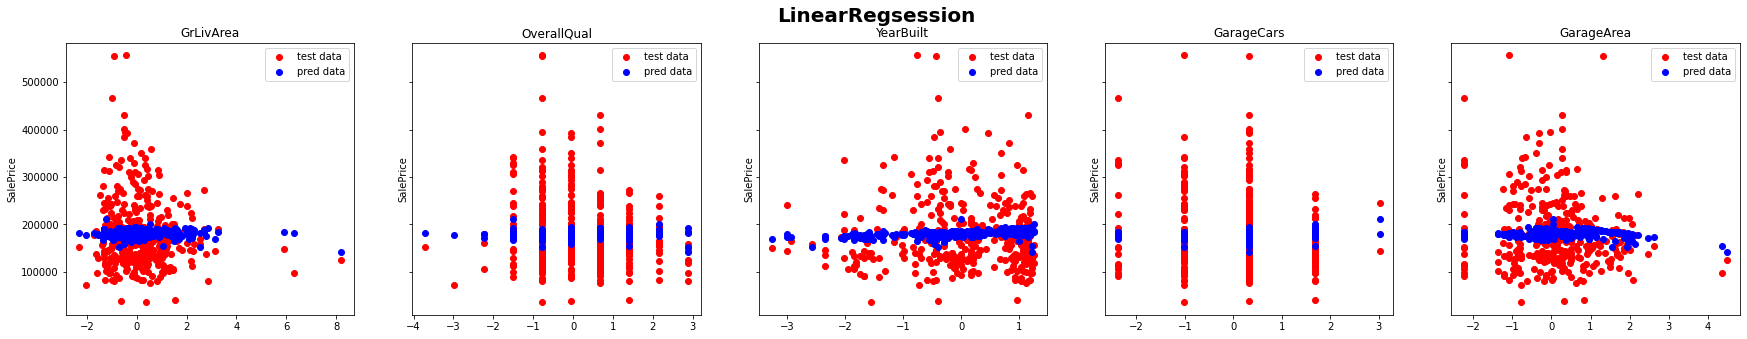

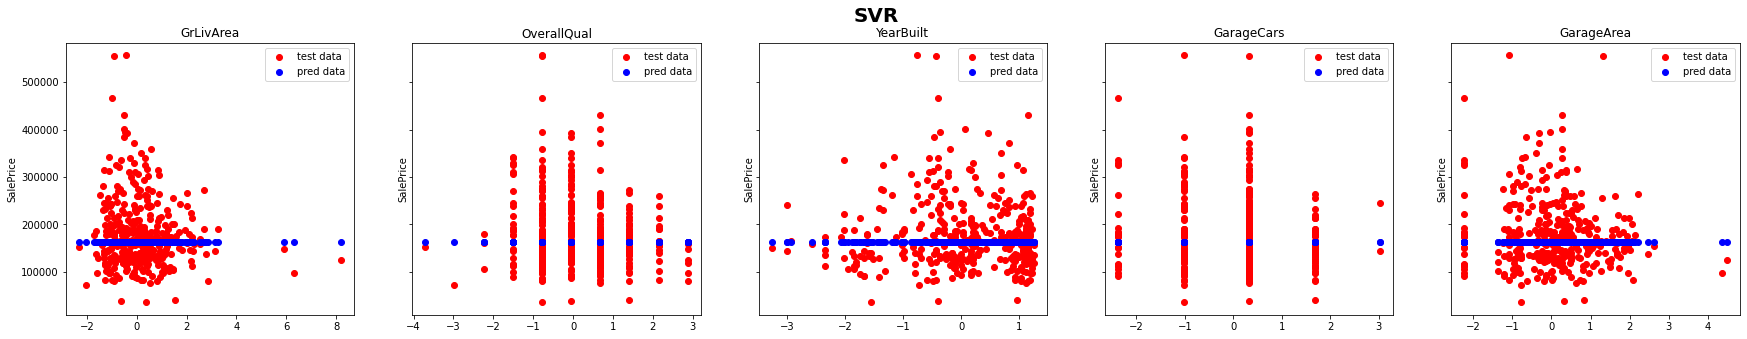

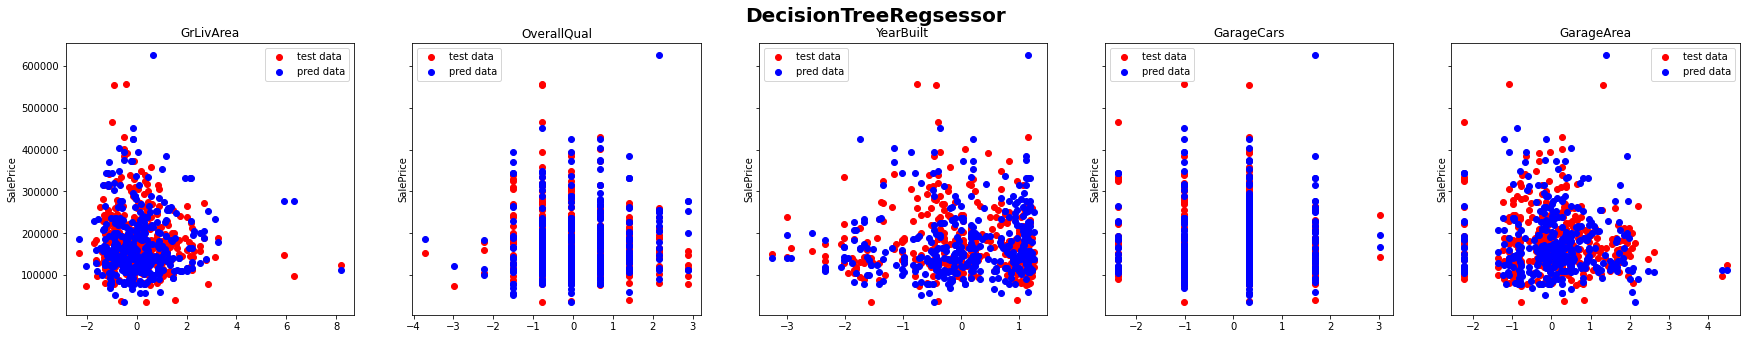

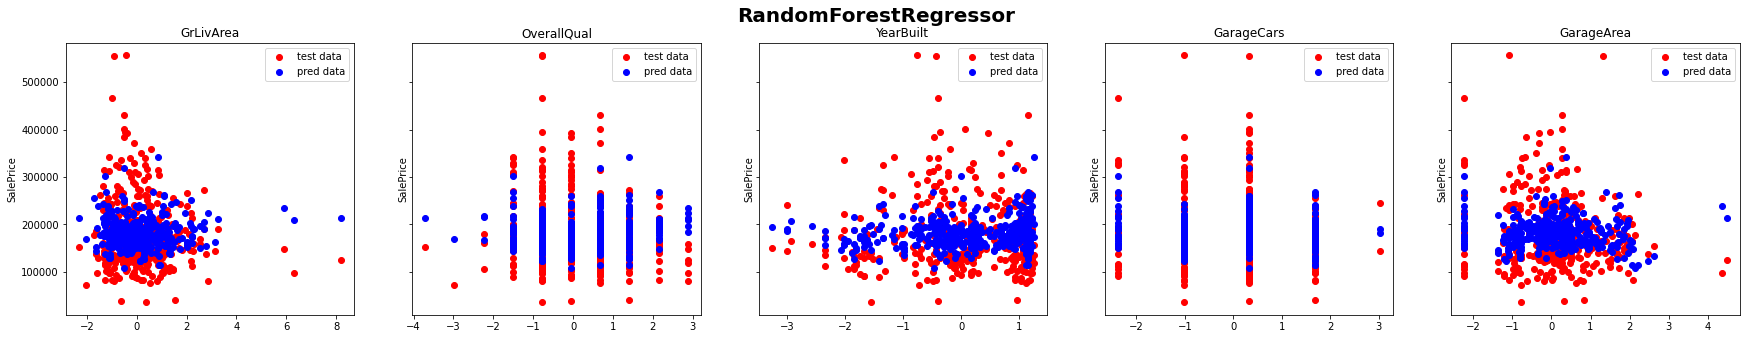

In [130]:
fe_list =['GrLivArea','OverallQual','YearBuilt','GarageCars','GarageArea']
Regression_Model(X_train_transform2, X_test_transform2, y2_train, y2_test,fe_list)
